# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Installing packages
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [ ]:
# Import library yang diperlukan untuk analisis clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, FastICA, NMF, KernelPCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.pipeline import Pipeline
from scipy.stats import pearsonr
from itertools import combinations
from scipy.stats import zscore
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples
from scipy.stats import shapiro
import plotly.express as px

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
#Type your code here
# Load dataset
file_path = "StudentPerformanceFactors.csv"
df = pd.read_csv(file_path, delimiter=",")

# Tampilkan informasi dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Memahami Tipe dan Struktur Data

In [ ]:
print("Jumlah baris dan kolom:", df.shape)
print("===================================")
print("\nTipe data setiap kolom:\n", df.dtypes)

Jumlah baris dan kolom: (6607, 20)

Tipe data setiap kolom:
 Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


**Insight**

Dataset StudentPerformanceFactors.csv memiliki 6607 baris dan 20 kolom, dengan kombinasi 7 kolom numerik dan 13 kolom kategorikal. Kolom numerik seperti Hours_Studied, Previous_Scores, Attendance, dan Exam_Score kemungkinan memiliki hubungan langsung dengan performa akademik siswa, sementara kolom kategorikal seperti Parental_Involvement, Access_to_Resources, Family_Income, dan Motivation_Level bisa mempengaruhi hasil secara tidak langsung.

## 2. Menangani Missing Value

In [ ]:
### 2. Menangani Data yang Hilang ###
print("\nJumlah Missing Values:\n", df.isnull().sum())

missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nPersentase Missing Values:\n", missing_percent)


Jumlah Missing Values:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Persentase Missing Values:
 Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000


**Insight**

Dari hasil analisis missing values, ditemukan bahwa tiga kolom memiliki nilai yang hilang dengan persentase yang relatif kecil dibandingkan total data. Teacher_Quality memiliki 78 nilai kosong (sekitar 1.18% dari total data), Parental_Education_Level memiliki 90 nilai kosong (1.36%), dan Distance_from_Home memiliki 67 nilai kosong (1.01%).

## 3. Analisis Korelasi dan Distribusi Data


Statistik Deskriptif:
        Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.

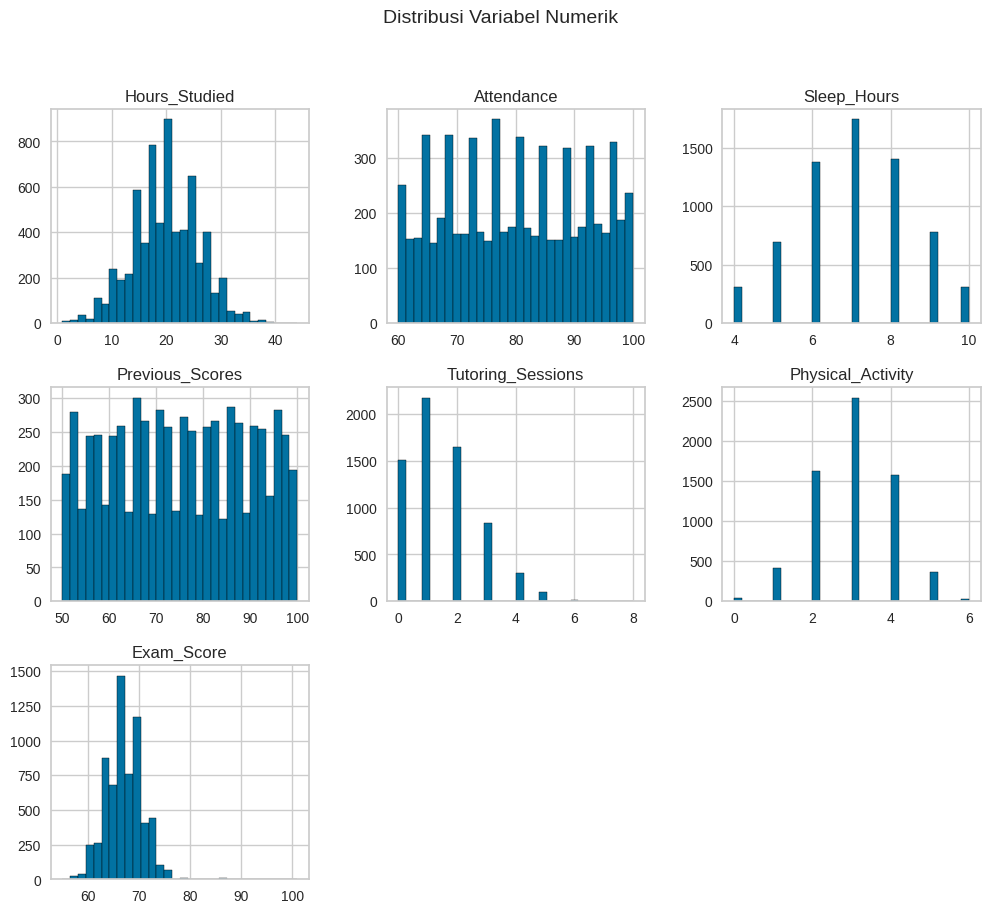

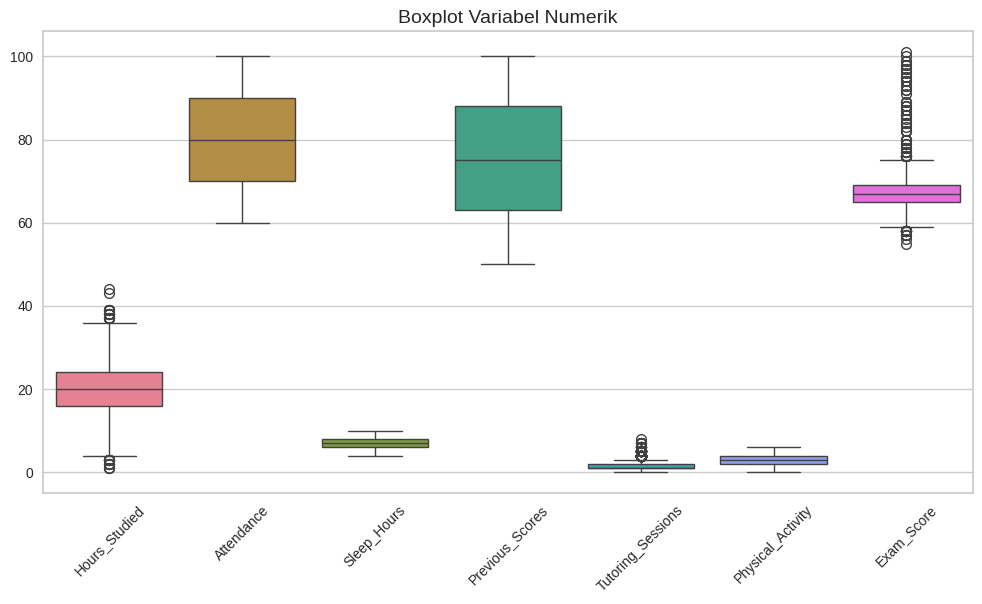

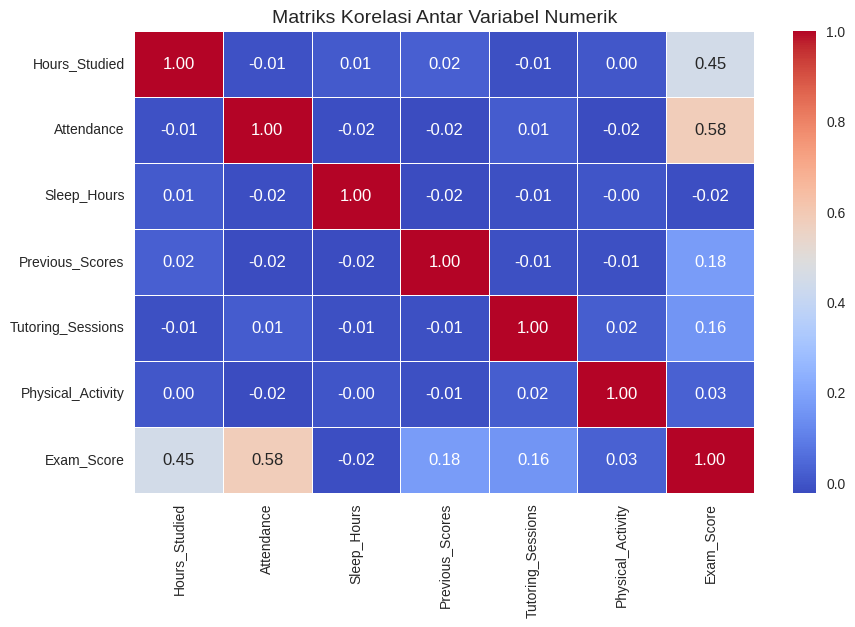

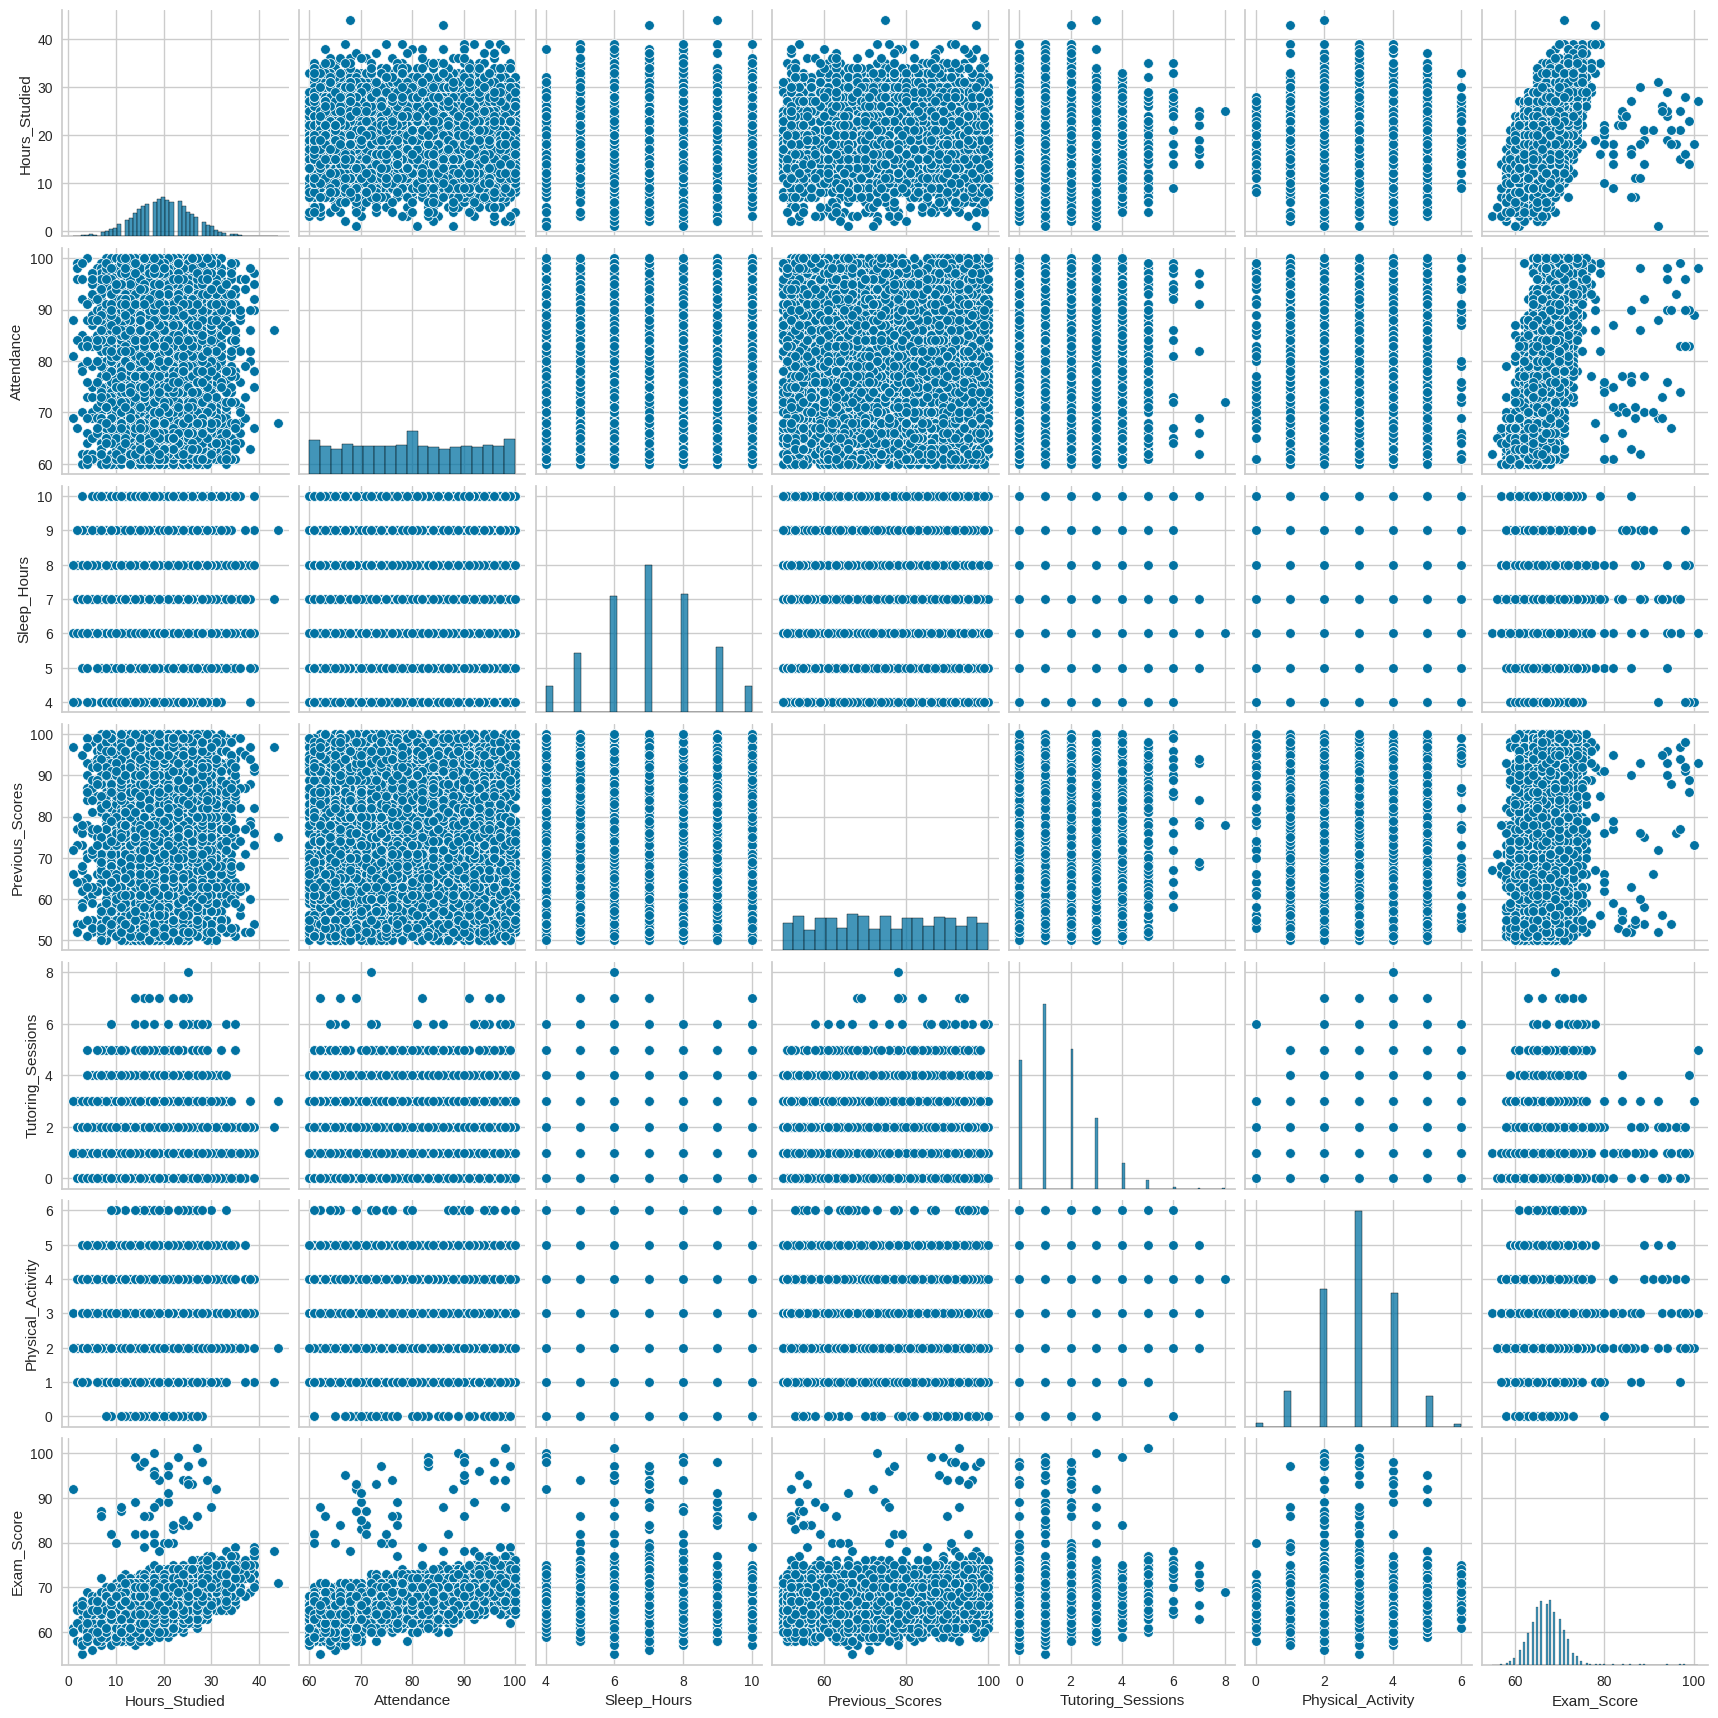

In [ ]:
# Menentukan kolom numerik dalam dataset
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Statistik deskriptif untuk variabel numerik
print("\nStatistik Deskriptif:\n", df[numerical_cols].describe())

# Visualisasi distribusi dengan histogram
df[numerical_cols].hist(figsize=(12, 10), bins=30, layout=(3, 3), edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik", fontsize=14)
plt.show()

# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot Variabel Numerik", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Matriks korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel Numerik", fontsize=14)
plt.show()

# Scatter plot untuk melihat hubungan antar variabel numerik
sns.pairplot(df[numerical_cols])
plt.show()

**Insight**

Dari hasil analisis korelasi dan distribusi data, terdapat beberapa temuan penting:

1. Distribusi Variabel Numerik
  *   Sebagian besar variabel numerik seperti Hours_Studied, Attendance, Previous_Scores, dan Exam_Score menunjukkan distribusi normal atau mendekati normal.

  *   Variabel seperti Tutoring_Sessions dan Physical_Activity tampaknya memiliki distribusi yang lebih miring (skewed).


2. Outlier

  * Dari boxplot, terlihat bahwa beberapa variabel seperti Tutoring_Sessions dan Exam_Score memiliki outlier, yang mungkin perlu dianalisis lebih lanjut sebelum tahap preprocessing.

3. Korelasi Antar Variabel

  * Attendance memiliki korelasi tertinggi dengan Exam_Score (0.58), menunjukkan bahwa semakin tinggi kehadiran siswa, semakin tinggi skor ujian mereka.

  * Hours_Studied juga memiliki korelasi positif yang cukup kuat dengan Exam_Score (0.45), menandakan bahwa waktu belajar berpengaruh terhadap hasil ujian.

  * Previous_Scores dan Tutoring_Sessions memiliki korelasi positif yang lebih rendah dengan Exam_Score (masing-masing 0.18 dan 0.16), yang berarti pengalaman belajar sebelumnya dan sesi bimbingan memberikan kontribusi kecil terhadap peningkatan skor.

4. Scatter Plot

  * Dari scatter plot, terlihat bahwa Hours_Studied dan Attendance memiliki hubungan positif yang cukup kuat terhadap Exam_Score, menunjukkan bahwa semakin lama belajar dan semakin tinggi kehadiran, semakin baik skor ujian.

  * Beberapa hubungan lain tampak lebih tersebar, menunjukkan bahwa variabel lain mungkin memiliki pengaruh yang lebih kompleks terhadap performa siswa.

## 4. Visualisasi Data

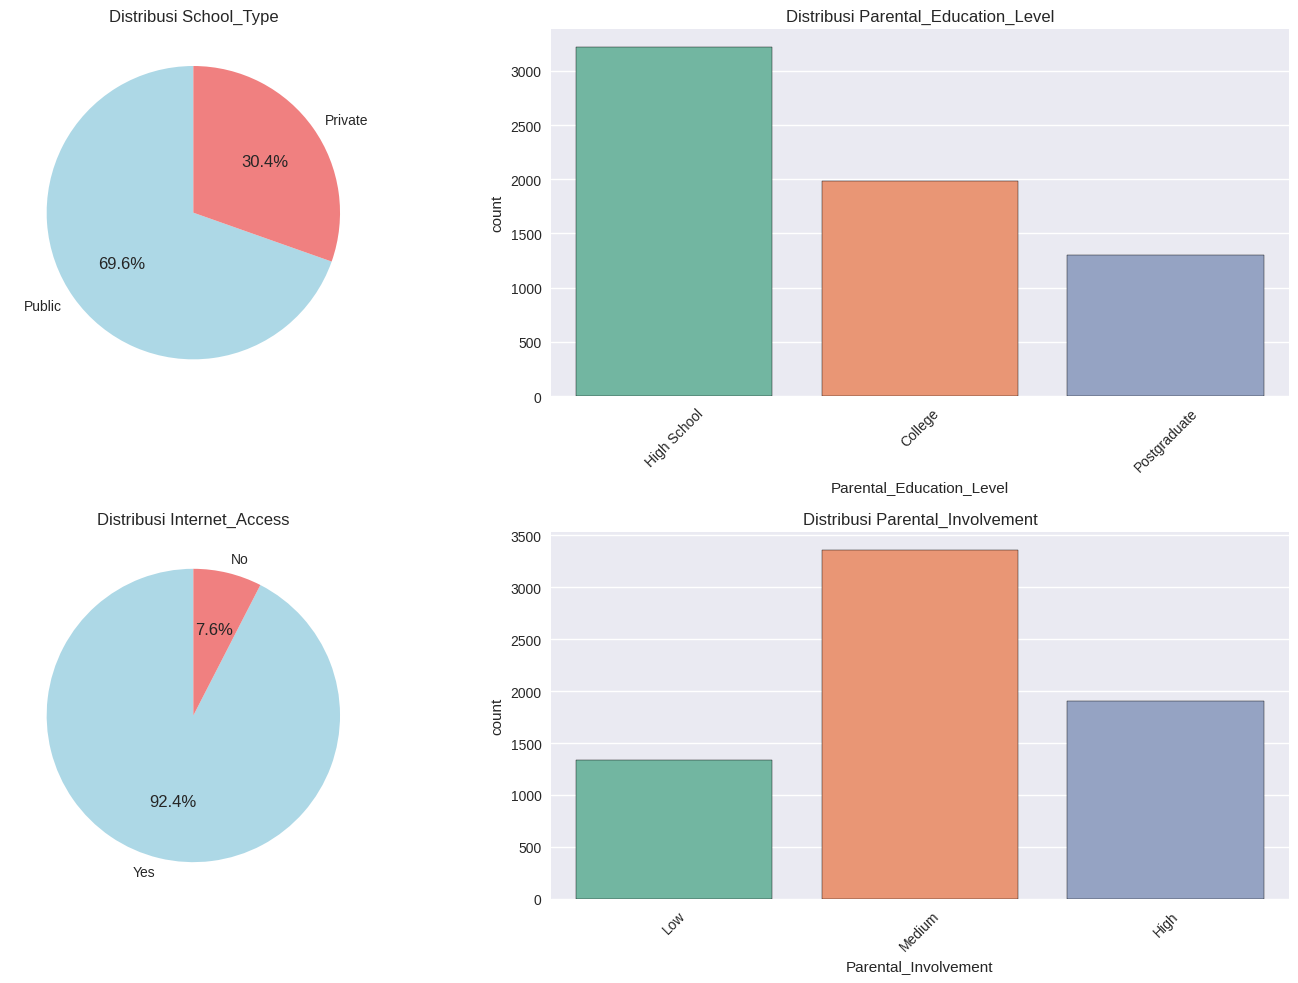

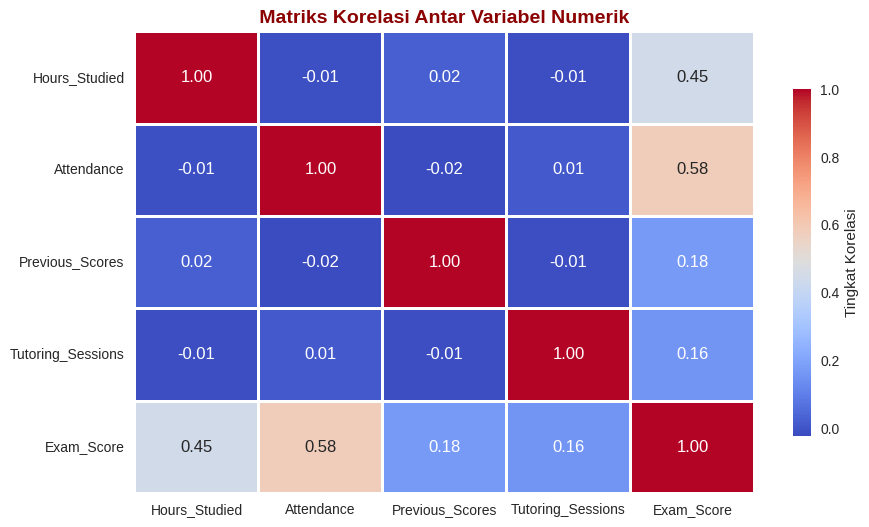

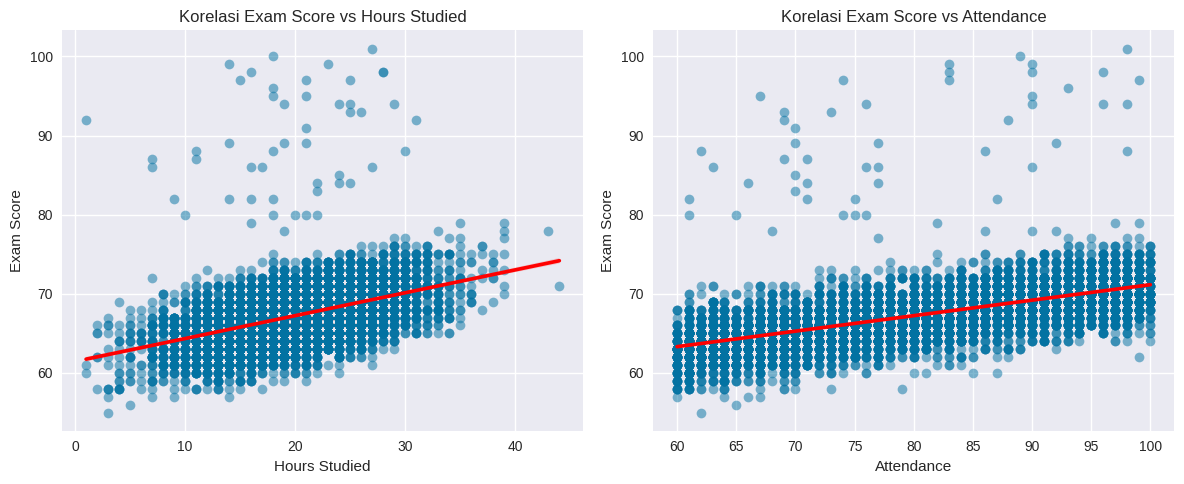

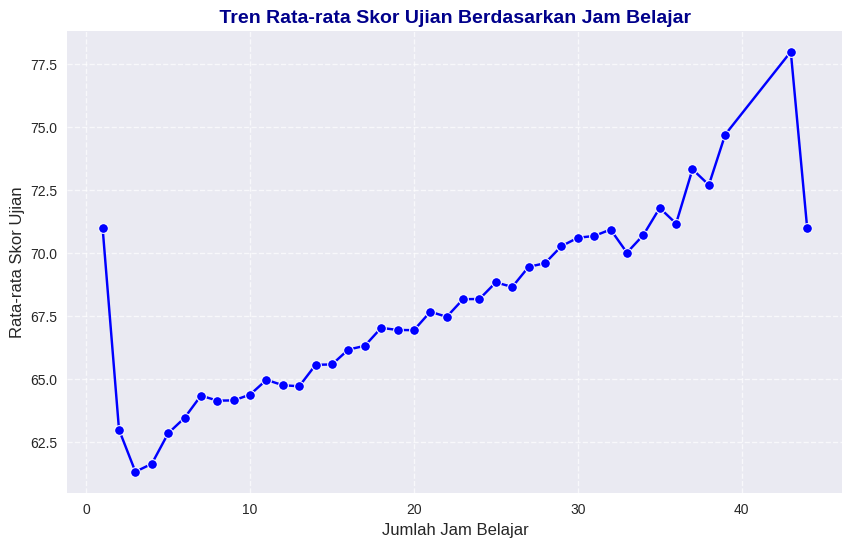

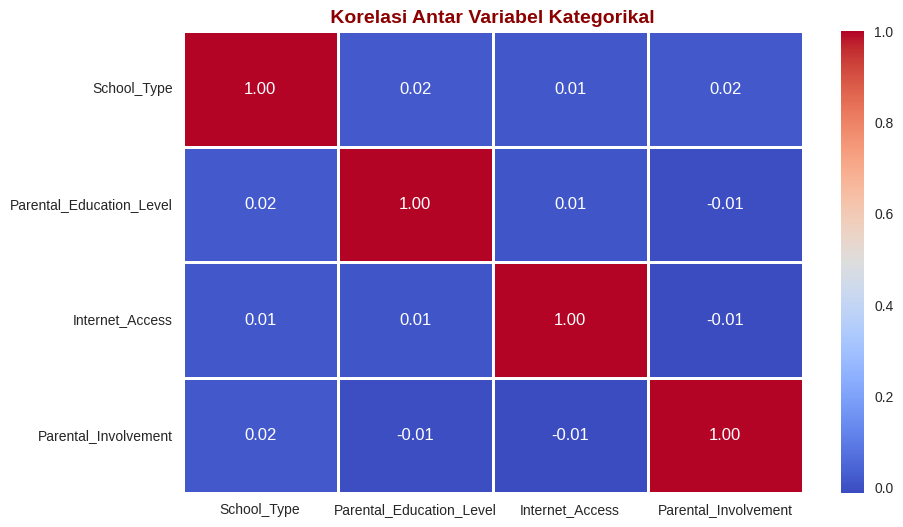

In [ ]:
# Konfigurasi visualisasi
plt.style.use("seaborn-v0_8-darkgrid")

# 1. Visualisasi Distribusi Variabel Kategorikal
categorical_features = ['School_Type', 'Parental_Education_Level', 'Internet_Access', 'Parental_Involvement']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    unique_values = df[col].nunique()

    if unique_values == 2:
        # Pie Chart untuk variabel dengan 2 kategori
        df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
        plt.ylabel('')
    else:
        # Bar Chart untuk variabel dengan lebih dari 2 kategori
        sns.countplot(data=df, x=col, hue=col, legend=False, edgecolor='black', palette='Set2')
        plt.xticks(rotation=45)

    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()


# 2. Heatmap - Korelasi Antar Variabel Numerik (Ditingkatkan)
numerical_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Exam_Score']

plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=1,
            cbar_kws={'shrink': 0.75, 'label': "Tingkat Korelasi"})
plt.title(" Matriks Korelasi Antar Variabel Numerik ", fontsize=14, fontweight='bold', color='darkred')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 3. Pairplot - Hubungan Antar Variabel Numerik yang Signifikan
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(x=df['Hours_Studied'], y=df['Exam_Score'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Korelasi Exam Score vs Hours Studied")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")

plt.subplot(1, 2, 2)
sns.regplot(x=df['Attendance'], y=df['Exam_Score'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Korelasi Exam Score vs Attendance")
plt.xlabel("Attendance")
plt.ylabel("Exam Score")

plt.tight_layout()
plt.show()

# 4. Garis Tren Rata-rata Skor Ujian berdasarkan Jam Belajar
df_grouped = df.groupby('Hours_Studied')['Exam_Score'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='Hours_Studied', y='Exam_Score', marker='o', linestyle='-', color='blue')
plt.title(" Tren Rata-rata Skor Ujian Berdasarkan Jam Belajar ", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Jumlah Jam Belajar", fontsize=12)
plt.ylabel("Rata-rata Skor Ujian", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 5. Korelasi Antar Variabel Kategorikal
plt.figure(figsize=(10, 6))
categorical_corr = df[categorical_features].apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(categorical_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title(" Korelasi Antar Variabel Kategorikal ", fontsize=14, fontweight='bold', color='darkred')
plt.show()


**Insight**

1. Distribusi Variabel Kategorikal

  * Mayoritas siswa berasal dari sekolah publik (69,6%).

  * Sebagian besar orang tua memiliki tingkat pendidikan SMA.

  * Akses internet di rumah tinggi (92,4%).

  * Keterlibatan orang tua dalam pendidikan anak bervariasi, dengan tingkat sedang paling dominan.

2. Korelasi Variabel Numerik

  * Jam belajar dan kehadiran memiliki korelasi positif dengan skor ujian.

  * Kehadiran memiliki korelasi lebih kuat (0.58) dibanding jam belajar (0.45).

  * Variabel lainnya memiliki korelasi lemah terhadap skor ujian.

3. Scatter Plot Korelasi

  * Terdapat tren positif antara jam belajar dan skor ujian, meskipun ada penyebaran data.

  * Kehadiran yang lebih tinggi cenderung dikaitkan dengan skor ujian yang lebih baik.

4. Tren Skor Ujian vs Jam Belajar

  * Rata-rata skor ujian meningkat seiring bertambahnya jam belajar, dengan beberapa fluktuasi.

  * Penurunan di awal mungkin menunjukkan bahwa sedikit jam belajar tidak cukup efektif.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 1. Menangani Missing Value

In [ ]:
#Type your code here
print("Missing Values Sebelum Penanganan:")
print(df.isnull().sum())


df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0], inplace=True)
df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mode()[0], inplace=True)
df["Distance_from_Home"] = df["Distance_from_Home"].fillna(df["Distance_from_Home"].mode()[0])

# Verifikasi apakah masih ada missing values
df.isnull().sum()

Missing Values Sebelum Penanganan:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


<ipython-input-8-d4eefecbf818>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0], inplace=True)
<ipython-input-8-d4eefecbf818>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


**Insight**

Dataset memiliki missing values pada tiga kolom berikut:

1. Teacher_Quality: 78 nilai hilang

2. Parental_Education_Level: 90 nilai hilang

3. Distance_from_Home: 67 nilai hilang

Ketiga kolom tersebut berisi data kategori Karena data kategori tidak memiliki nilai numerik yang bisa dirata-ratakan, mengisi dengan nilai paling umum memastikan data tetap masuk akal tanpa memperkenalkan bias besar.

## 2. Menghapus Data Duplikat

In [ ]:
# Mengecek jumlah data duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat sebelum dihapus: {jumlah_duplikat}")

# Menghapus data duplikat
df= df.drop_duplicates()

# Mengecek jumlah data setelah penghapusan duplikat
print(f"Jumlah data setelah menghapus duplikat: {df.shape[0]}")


Jumlah data duplikat sebelum dihapus: 0
Jumlah data setelah menghapus duplikat: 6607


**Insight**

Tidak ada data yang terduplikasi

## 3. Normalisasi atau Standarisasi Fitur

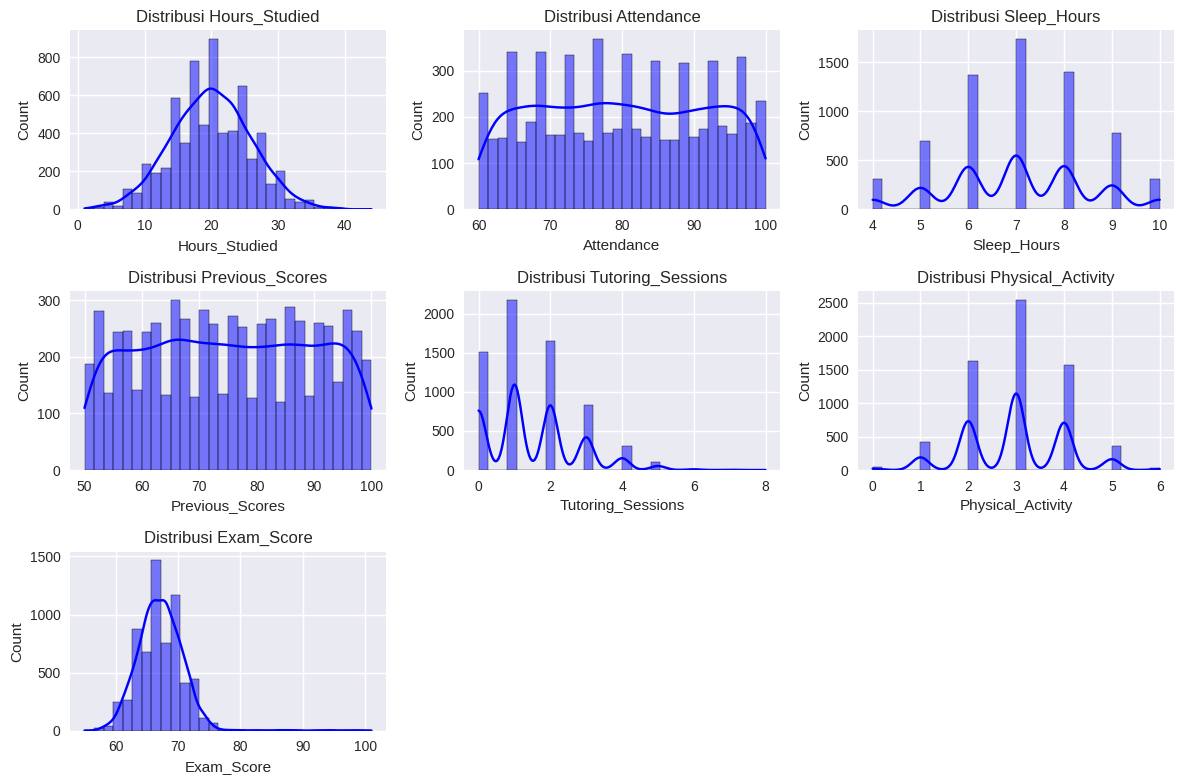

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
# Pilih hanya kolom numerik
numerical_features = ["Hours_Studied", "Attendance", "Sleep_Hours",
                      "Previous_Scores", "Tutoring_Sessions",
                      "Physical_Activity", "Exam_Score"]

# Statistik deskriptif sebelum transformasi
before_scaling_stats = df[numerical_features].describe()

# Visualisasi distribusi data numerik sebelum transformasi
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

# Menampilkan statistik deskriptif
before_scaling_stats

Analisis Distribusi Data Numerik
Dari histogram dan statistik deskriptif, kita bisa melihat bahwa:

1. Hours_Studied, Attendance, Previous_Scores, Exam_Score → Distribusi mendekati normal, sehingga cocok menggunakan Standard Scaling (Z-score).

2. Sleep_Hours, Tutoring_Sessions, Physical_Activity → Beberapa fitur memiliki rentang kecil dengan distribusi yang tidak normal, lebih cocok menggunakan Min-Max Scaling.

Metode yang Akan Digunakan
1. Standard Scaling (Z-score) untuk: Hours_Studied, Attendance, Previous_Scores, Exam_Score

2. Min-Max Scaling (0-1) untuk: Sleep_Hours, Tutoring_Sessions, Physical_Activity

In [ ]:
# Inisialisasi scaler
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Fitur yang akan distandarisasi (Z-score)
standard_features = ["Hours_Studied", "Attendance", "Previous_Scores", "Exam_Score"]
df[standard_features] = standard_scaler.fit_transform(df[standard_features])

# Fitur yang akan dinormalisasi (Min-Max Scaling)
minmax_features = ["Sleep_Hours", "Tutoring_Sessions", "Physical_Activity"]
df[minmax_features] = minmax_scaler.fit_transform(df[minmax_features])

# Statistik setelah transformasi
after_scaling_stats = df[standard_features + minmax_features].describe()

# Menampilkan hasil perbandingan
after_scaling_stats

,Hours_Studied,Attendance,Previous_Scores,Exam_Score,Sleep_Hours,Tutoring_Sessions,Physical_Activity
count,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6607.000000,6607.000000,6607.000000
mean,-1.161474e-16,-3.089199e-16,2.048712e-16,-1.178681e-15,0.504843,0.186715,0.494602
std,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,0.244687,0.153821,0.171872
min,-3.167760e+00,-1.730158e+00,-1.741167e+00,-3.145283e+00,0.000000,0.000000,0.000000
25%,-6.636453e-01,-8.641026e-01,-8.383073e-01,-5.746957e-01,0.333333,0.125000,0.333333
50%,4.118568e-03,1.953115e-03,-4.898448e-03,-6.057825e-02,0.500000,0.125000,0.500000
75%,6.718825e-01,8.680088e-01,8.979612e-01,4.535392e-01,0.666667,0.250000,0.666667
max,4.010702e+00,1.734065e+00,1.731370e+00,8.679419e+00,1.000000,1.000000,1.000000


Hasil Normalisasi dan Standarisasi

✅ Standard Scaling (Z-score) berhasil diterapkan pada:

* Hours_Studied, Attendance, Previous_Scores, Exam_Score

* Mean ≈ 0, Standar Deviasi ≈ 1, yang menyesuaikan skala tanpa mengubah pola distribusi.

✅ Min-Max Scaling berhasil diterapkan pada:

* Sleep_Hours, Tutoring_Sessions, Physical_Activity

* Nilai diubah ke rentang 0-1, menjaga hubungan proporsional antar data.

## 4. Deteksi dan Penanganan Outlier

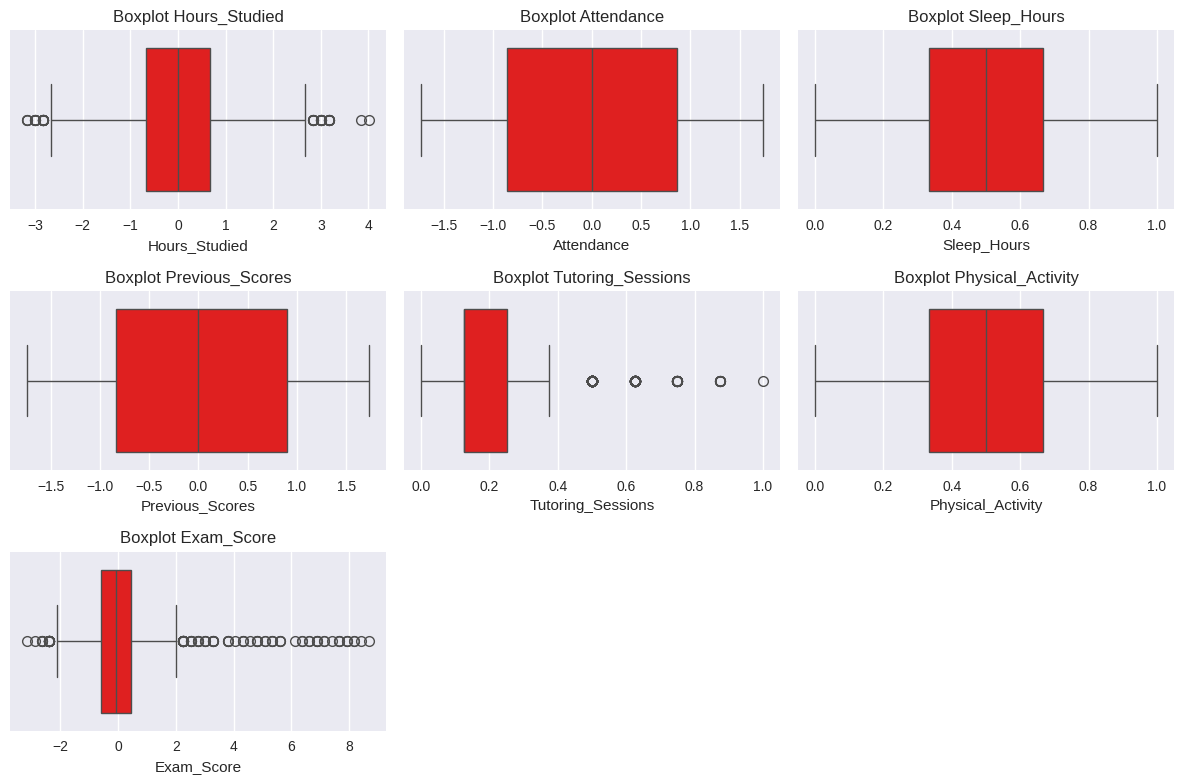

{'Hours_Studied': 43,
 'Attendance': 0,
 'Sleep_Hours': 0,
 'Previous_Scores': 0,
 'Tutoring_Sessions': 430,
 'Physical_Activity': 0,
 'Exam_Score': 104}

In [ ]:
# Visualisasi Boxplot untuk melihat distribusi outlier
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color="red")
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

# Deteksi outlier menggunakan IQR
outlier_counts = {}
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menyimpan jumlah outlier
    outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

# Menampilkan jumlah outlier per fitur
outlier_counts

Hasil Deteksi Outlier

Dari boxplot dan perhitungan IQR (Interquartile Range), ditemukan jumlah outlier sebagai berikut:

* Hours_Studied → 43 outlier

* Tutoring_Sessions → 430 outlier (jumlah signifikan)

* Exam_Score → 104 outlier

* Attendance, Sleep_Hours, Previous_Scores, Physical_Activity → Tidak memiliki outlier

Strategi Penanganan Outlier

* Hours_Studied & Exam_Score → Bisa dipertahankan jika relevan atau dibatasi dalam range IQR.
* Tutoring_Sessions → Outlier sangat banyak, bisa dipertimbangkan untuk dihapus atau dibatasi.
* Fitur lain → Tidak perlu tindakan karena tidak memiliki outlier.

Saya akan menerapkan strategi membatasi outlier dalam range IQR untuk menjaga kestabilan model.

In [ ]:
# Menangani Outlier dengan Metode Capping (Membatasi dalam IQR Range)

# Fungsi untuk membatasi outlier dalam batas IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Batasi nilai outlier agar berada dalam range IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Terapkan metode capping pada fitur yang memiliki outlier
outlier_columns = ["Hours_Studied", "Tutoring_Sessions", "Exam_Score"]
for col in outlier_columns:
    cap_outliers(df, col)

# Verifikasi apakah masih ada outlier setelah proses capping
new_outlier_counts = {}
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghitung kembali jumlah outlier setelah proses capping
    new_outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

# Menampilkan jumlah outlier setelah capping
new_outlier_counts

{'Hours_Studied': 0, 'Tutoring_Sessions': 0, 'Exam_Score': 0}

Hasil Penanganan Outlier

✅ Semua outlier pada Hours_Studied, Tutoring_Sessions, dan Exam_Score telah berhasil diatasi!

✅ Metode Capping (membatasi dalam range IQR) berhasil diterapkan, sehingga nilai-nilai ekstrem tidak dihapus tetapi dibatasi dalam rentang yang wajar.



## 5. Encoding Data Kategorikal

In [ ]:
# Identifikasi fitur kategorikal
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Menampilkan daftar fitur kategorikal
categorical_features

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

Fitur Kategorikal yang Ditemukan:

Dataset memiliki 13 fitur kategorikal, termasuk:

* Nominal (tanpa urutan tertentu): Gender, School_Type, Internet_Access, Peer_Influence

* Ordinal (memiliki urutan tertentu): Parental_Education_Level, Motivation_Level

Strategi Encoding:

✅ Label Encoding untuk variabel ordinal

✅ One-Hot Encoding untuk variabel nominal

In [ ]:
# Label Encoding untuk variabel ordinal
label_encoder = LabelEncoder()
ordinal_features = ["Parental_Education_Level", "Motivation_Level", "Distance_from_Home", "Teacher_Quality"]

for col in ordinal_features:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding untuk variabel nominal
nominal_features = ["Gender", "School_Type", "Internet_Access", "Peer_Influence",
                    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
                    "Family_Income", "Learning_Disabilities"]

df = pd.get_dummies(df, columns=nominal_features, drop_first=True)  # drop_first=True untuk menghindari dummy trap

# Menampilkan 5 baris pertama setelah encoding
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Teacher_Quality,Physical_Activity,Parental_Education_Level,Distance_from_Home,...,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Family_Income_Low,Family_Income_Medium,Learning_Disabilities_Yes
0,0.504942,0.348375,0.500000,-0.143800,1,0.000,2,0.500000,1,2,...,False,True,True,False,False,False,False,True,False,False
1,-0.162822,-1.383736,0.666667,-1.116110,1,0.250,2,0.666667,0,1,...,False,False,True,False,False,True,False,False,True,False
2,0.671882,1.560853,0.500000,1.106313,2,0.250,2,0.666667,2,2,...,True,False,False,True,False,True,True,False,True,False
3,1.506587,0.781403,0.666667,1.592469,2,0.125,2,0.666667,1,1,...,False,False,True,False,False,True,True,False,True,False
4,-0.162822,1.041220,0.333333,-0.699406,2,0.375,0,0.666667,0,2,...,True,False,False,True,False,True,True,False,True,False


## 6. Binning

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.